<a href="https://colab.research.google.com/github/alex-movila/ML-Colab-Tutorials/blob/master/deep_learning_fundamentals_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# Deep Learning Fundamentals - Part 1

## Colab environment

In [ ]:
!python --version

Python 3.6.9


In [ ]:
!pip list | grep tensor

tensorboard                   2.4.0          
tensorboard-plugin-wit        1.7.0          
tensorboardcolab              0.0.22         
tensorflow                    2.4.0          
tensorflow-addons             0.8.3          
tensorflow-datasets           4.0.1          
tensorflow-estimator          2.4.0          
tensorflow-gcs-config         2.4.0          
tensorflow-hub                0.11.0         
tensorflow-metadata           0.26.0         
tensorflow-privacy            0.2.2          
tensorflow-probability        0.12.1         


In [ ]:
!pip list | grep torch

torch                         1.7.0+cu101    
torchsummary                  1.5.1          
torchtext                     0.3.1          
torchvision                   0.8.1+cu101    


In [ ]:
!nvidia-smi

# It's okay to run this notebook without a GPU!

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## Basic numerical computing

In [ ]:
import numpy as np

# Initialize a numpy ndarray with 3 rows, 2 columns
X = np.zeros((3, 2))
X

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
# By default, ndarrays are float64
X.shape, X.dtype

((3, 2), dtype('float64'))

In [ ]:
# We can set values of a whole row
X[0, :] = 1
X

array([[1., 1.],
       [0., 0.],
       [0., 0.]])

In [ ]:
# We can set values of a whole column
X[:, 0] = 2
X

array([[2., 1.],
       [2., 0.],
       [2., 0.]])

In [ ]:
X = np.array([
  [1, 2],
  [3, 4],
  [5, 6]
])
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
x = np.array([10, 20])
print(X.shape, x.shape)

# We can add ndarrays of different dimensions
X + x

(3, 2) (2,)


array([[11, 22],
       [13, 24],
       [15, 26]])

In [ ]:
X.shape, x.shape

((3, 2), (2,))

In [ ]:
# Element-wise multiplication

X * x

array([[ 10,  40],
       [ 30,  80],
       [ 50, 120]])

In [ ]:
# Matrix multiplication
# http://matrixmultiplication.xyz/

x = np.array([[10, 20],]).T
result = X @ x  # alternatively, np.dot(X, x)
result

array([[ 50],
       [110],
       [170]])

### Indexing

In [ ]:
X = np.random.rand(3, 2)
X

array([[0.02534031, 0.44793754],
       [0.85077429, 0.31611382],
       [0.33252517, 0.04271171]])

In [ ]:
X > 0.5

array([[False, False],
       [ True, False],
       [False, False]])

In [ ]:
X[X > 0.5] = 1
X

array([[0.02534031, 0.44793754],
       [1.        , 0.31611382],
       [0.33252517, 0.04271171]])

## Basic plotting

In [ ]:
import matplotlib.pyplot as plt
plt.set_cmap('gray')

<Figure size 432x288 with 0 Axes>

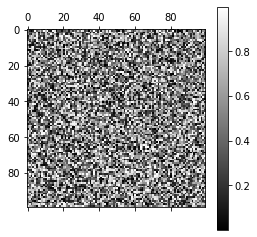

In [ ]:
X = np.random.rand(100, 100)
plt.matshow(X)
plt.colorbar()

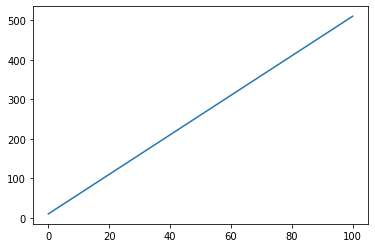

In [ ]:
x = np.linspace(0, 100)
y = x * 5 + 10
# y = x * w + b

plt.plot(x, y)

## Basic regression with a linear model

x: (50, 1), weights: (1, 1), bias: (1,), y: (50, 1)


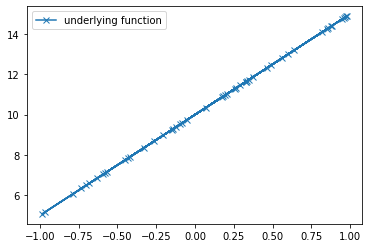

In [ ]:
# x is 1-dimensional

n = 50

d = 1
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5],])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plt.plot(x, y_true, marker='x', label='underlying function')
plt.legend()

### Basic prediction function: Linear

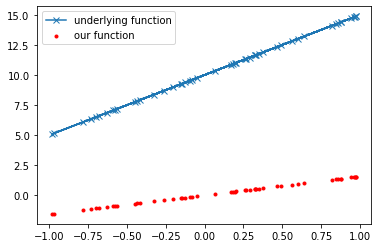

In [ ]:
# Let's initialize our predictions

class Linear:
  def __init__(self, num_input, num_output=1):
    # The initialization is important to properly deal with different
    # input sizes (otherwise gradients quickly go to 0).
    self.weights = np.random.randn(num_input, num_output) * np.sqrt(2. / num_input)
    self.bias = np.zeros((1))
  
  def __call__(self, x):
    return x @ self.weights + self.bias

linear = Linear(d)
y_pred = linear(x)
plt.plot(x, y_true, marker='x', label='underlying function')
plt.scatter(x, y_pred, color='r', marker='.', label='our function')
plt.legend()

### Basic loss function: MSE


In [ ]:
# How wrong are these initial predictions, exactly?
# It's up to us, and our definition is called the loss function.
# Let's use Mean Squared Error (MSE) as our loss function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()
  
loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 111.17820592631713


### Add back propagation

In [ ]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) - 0.5
    self.bias = np.random.randn(1) - 0.5
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    # print('Linear forward', x.shape, self.weights.shape, output.shape)
    return output

  # y = w*x + b
  # dy/dx = w
  # dy/dw = x
  # dy/db = 1

  def backward(self, gradient):
    # print('Linear backward', gradient.shape, self.x.shape, self.weights.shape, self.bias.shape)
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum()
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [ ]:
# Take one step forward and one step backward to make sure nothing breaks, and that the loss decreases.
loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(x)
print(loss(y_pred, y_true))

157.77583612186822
102.25542590626038


### Train using gradient descent!

Epoch 0, loss 144.55857435632967
Epoch 5, loss 16.113907005459684
Epoch 10, loss 2.2797939950423323
Epoch 15, loss 0.5505209473182419
Epoch 20, loss 0.21761698402958657
Epoch 25, loss 0.10445006678219274
Epoch 30, loss 0.052582892979395314
Epoch 35, loss 0.02673982056996795
Epoch 40, loss 0.013625918756525659
Epoch 45, loss 0.006946307943583618
Epoch 50, loss 0.003541431630023021
Epoch 55, loss 0.001805556526230555


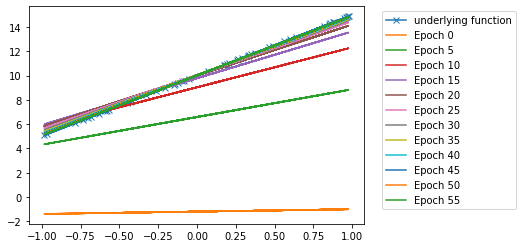

In [ ]:
plt.plot(x, y_true, marker='x', label='underlying function')

loss = MSE()
linear = Linear(d)

num_epochs = 60
lr = 0.1

for epoch in range(num_epochs):
  y_pred = linear(x)
  loss_value = loss(y_pred, y_true)

  if epoch % 5 == 0:
    print(f'Epoch {epoch}, loss {loss_value}')
    plt.plot(x, y_pred.squeeze(), label=f'Epoch {epoch}')

  gradient_from_loss = loss.backward()
  linear.backward(gradient_from_loss)
  linear.update(lr)

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left");

### 2-dimensional inputs work, too

(100, 2) (2, 1) (1,)
x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


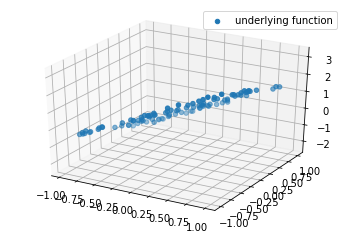

In [ ]:
# What about 2-dimensional x?

n = 100
d = 2
x = np.random.uniform(-1, 1, (n, d))

# y = w * x + b
# y = w_0 * x_0 + w_1 * x_1 + b
# y = w@x + b

weights_true = np.array([[2, -1], ]).T
bias_true = np.array([0.5])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_3d(x, y_true)

1.9035703278566733


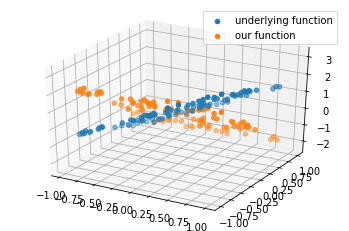

In [ ]:
loss = MSE()
linear = Linear(2)
y_pred = linear(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

Epoch 0, loss 1.9035703278566733
Epoch 1, loss 1.6447017768048113
Epoch 2, loss 1.4229818471616116
Epoch 3, loss 1.2324025388489432
Epoch 4, loss 1.0681508745696993
Epoch 5, loss 0.9263058198862569
Epoch 6, loss 0.8036276326046468
Epoch 7, loss 0.6974085484812704
Epoch 8, loss 0.6053646208667022
Epoch 9, loss 0.5255555504730874
Epoch 10, loss 0.45632386492411525
Epoch 11, loss 0.39624773052422796
Epoch 12, loss 0.3441035735737995
Epoch 13, loss 0.2988359225346429
Epoch 14, loss 0.25953269063508455
Epoch 15, loss 0.22540465196230522
Epoch 16, loss 0.19576821957008556
Epoch 17, loss 0.17003087387762567
Epoch 18, loss 0.14767875371887812
Epoch 19, loss 0.1282660366705865
Epoch 20, loss 0.1114058164636693
Epoch 21, loss 0.09676224422629966
Epoch 22, loss 0.08404374410530752
Epoch 23, loss 0.07299714712084823
Epoch 24, loss 0.0634026130113481
Epoch 25, loss 0.05506923038580948
Epoch 26, loss 0.04783120211868062
Epoch 27, loss 0.04154453656328629
Epoch 28, loss 0.036084176500288556
Epoch 29,

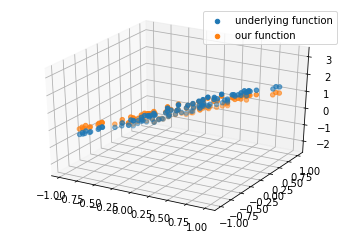

In [ ]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=30)
plot_3d(x, y_true, linear(x))

## Basic regression with a Multi-layer Perceptron

So, we now have a way to automatically fit a linear function to N-dimensional data.

How can this be made to work for non-linear data?

x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


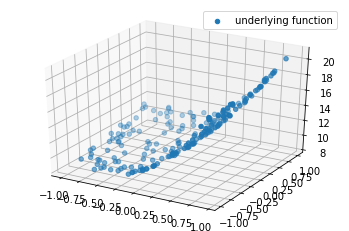

In [ ]:
# Make non-linear data

n = 200
d = 2
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 1],]).T
bias_true = np.array([10])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_3d(x, y_true)

Epoch 0, loss 201.87077920408942
Epoch 1, loss 132.1432013337912
Epoch 2, loss 87.25374179122757
Epoch 3, loss 58.2938694250642
Epoch 4, loss 39.558101996718285
Epoch 5, loss 27.391337319614323
Epoch 6, loss 19.45112224193953
Epoch 7, loss 14.235473120384427
Epoch 8, loss 10.780645865708065
Epoch 9, loss 8.467673466506556
Epoch 10, loss 6.898516207938793
Epoch 11, loss 5.816766431530725
Epoch 12, loss 5.056871009773752
Epoch 13, loss 4.511608053773493
Epoch 14, loss 4.111249138814477
Epoch 15, loss 3.8102028906192813
Epoch 16, loss 3.5784490489506084
Epoch 17, loss 3.3960406068698163
Epoch 18, loss 3.2495714557177986
Epoch 19, loss 3.1299036710426047
Epoch 20, loss 3.030702483436607
Epoch 21, loss 2.9474894990170757
Epoch 22, loss 2.877028766825688
Epoch 23, loss 2.8169268896335655
Epoch 24, loss 2.765371015175859
Epoch 25, loss 2.7209558502809466
Epoch 26, loss 2.6825683297530167
Epoch 27, loss 2.649309777456783
Epoch 28, loss 2.6204425795759563
Epoch 29, loss 2.595352996467948
Epoch 

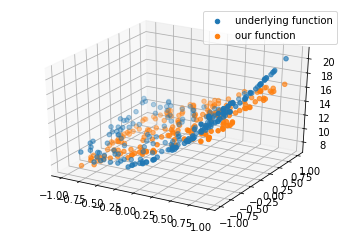

In [ ]:
# We can train just fine, but the final loss will remain high, as our linear function is incapable
# of representing the data.

loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, linear(x))

### Add non-linearity: ReLU

In [ ]:
# In order to learn non-linear functions, we need non-linearities in our model.

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


### Train our new non-linear model

211.56512672564807


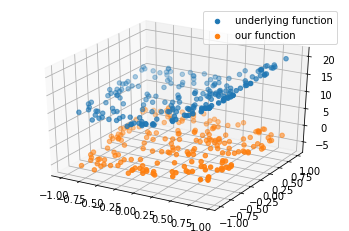

In [ ]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden, 1)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

In [ ]:
# Test just one forward and backward step
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

227.40042054477118
133.48481900526815


Epoch 0, loss 133.48481900526815
Epoch 1, loss 87.4225675642725
Epoch 2, loss 56.073907284303495
Epoch 3, loss 36.74824252230368
Epoch 4, loss 23.55809695392851
Epoch 5, loss 7.454378754723877
Epoch 6, loss 5.726032739235969
Epoch 7, loss 40.24969876699159
Epoch 8, loss 21.250724383731367
Epoch 9, loss 10.668889950413963
Epoch 10, loss 4.585735147065276
Epoch 11, loss 2.4974935892661367
Epoch 12, loss 1.4094384848302928
Epoch 13, loss 0.8817120684139138
Epoch 14, loss 0.6119270765591367
Epoch 15, loss 0.4650826245027097
Epoch 16, loss 0.3830718634185763
Epoch 17, loss 0.3326951194138412
Epoch 18, loss 0.2986792051825535
Epoch 19, loss 0.2778503329305181


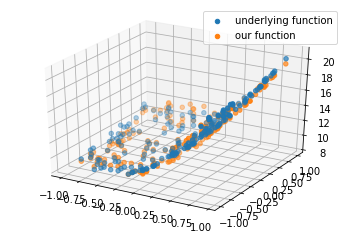

In [ ]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true, model(x))

### Same thing, in PyTorch

tensor(163.3515, grad_fn=<MseLossBackward>)


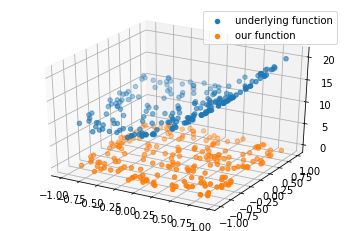

In [ ]:
import torch
import torch.nn as nn


class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 1)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2


loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
plot_3d(x_tensor, y_true_tensor, y_pred_tensor.detach())

In [ ]:
# Test just one forward and backward step
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(163.3515, grad_fn=<MseLossBackward>)
tensor(154.0658, grad_fn=<MseLossBackward>)


tensor(154.0658, grad_fn=<MseLossBackward>)
tensor(74.3276, grad_fn=<MseLossBackward>)
tensor(14.2768, grad_fn=<MseLossBackward>)
tensor(38.9007, grad_fn=<MseLossBackward>)
tensor(30.8301, grad_fn=<MseLossBackward>)
tensor(80.6076, grad_fn=<MseLossBackward>)
tensor(51.3401, grad_fn=<MseLossBackward>)
tensor(27.4505, grad_fn=<MseLossBackward>)
tensor(6.0967, grad_fn=<MseLossBackward>)
tensor(2.2995, grad_fn=<MseLossBackward>)
tensor(1.7225, grad_fn=<MseLossBackward>)
tensor(1.1450, grad_fn=<MseLossBackward>)
tensor(1.0188, grad_fn=<MseLossBackward>)
tensor(0.7689, grad_fn=<MseLossBackward>)
tensor(0.6917, grad_fn=<MseLossBackward>)
tensor(0.5547, grad_fn=<MseLossBackward>)
tensor(0.4991, grad_fn=<MseLossBackward>)
tensor(0.4133, grad_fn=<MseLossBackward>)
tensor(0.3700, grad_fn=<MseLossBackward>)
tensor(0.3158, grad_fn=<MseLossBackward>)


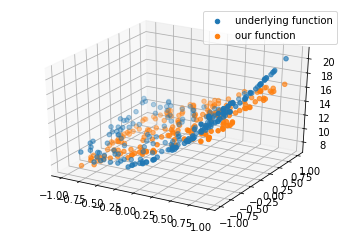

In [ ]:
# Now we run the training loop

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true, linear(x))

### Same thing, in Tensorflow/Keras

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
regression (Dense)           (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
7/7 [==============================] - 0s 2ms/step - loss: 88.5756
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 8.6065
Epoch 3/10
7/7 [==============================] - 0s 1ms/step - loss: 5.7860
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 0.4606
Epoch 5/10
7/7 [==============================] - 0s 1ms/step - loss: 0.4390
Ep

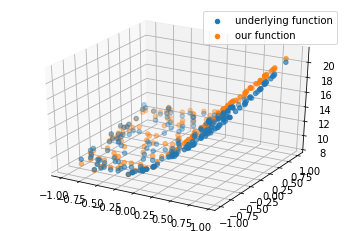

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(2,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

model.fit(x, y_true, epochs=10)

y_pred = model.predict(x)

plot_3d(x, y_true, model(x))

## Next time

We will work on a classification task.